<a href="https://colab.research.google.com/github/yuanjinren/DS/blob/master/YuanjinRen_Unit2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Are financial indicators and stock values related? **

According to historical records, the average annual return of S&P 500 is approximately 10%–11% since its inception in 1926. However, is it possible to build up a machine learning model that can predict a specific stock's price will rise or fall in the next year based on last year's financial performance? In addition, is there a method which is able to predict stock price changes in the following year? 

In this research, I will use more than 200 financial indicators of US stocks from 2014 to 2018 to predict the price variance and the stock price trend in the following year. 

This dataset is from Kaggle: https://www.kaggle.com/cnic92/200-financial-indicators-of-us-stocks-20142018. In this dataset, The last column of the dataset represent the class of each stock, where: if the value of a stock increases during next year, then class=1; if the value of a stock decreases during next year, then class=0. The second-to-last column, PRICE VAR [%], lists the percent price variation of each stock for the next year. For example, percent price variation for the year 2016 (meaning from the first trading day on Jan 2016 to the last trading day on Dec 2016).The columns PRICE VAR [%] and class make possible to use the datasets for both classification and regression tasks.

###Data Exploration

*Load Dataset*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
pd.options.display.float_format = '{:,.0f}'.format

In [4]:
df2014 = pd.read_csv('/content/drive/My Drive/Data/2014_Financial_Data.csv')
df2015 = pd.read_csv('/content/drive/My Drive/Data/2015_Financial_Data.csv')
df2016 = pd.read_csv('/content/drive/My Drive/Data/2016_Financial_Data.csv')
df2017 = pd.read_csv('/content/drive/My Drive/Data/2017_Financial_Data.csv')
df2018 = pd.read_csv('/content/drive/My Drive/Data/2018_Financial_Data.csv')
df2014.shape,df2015.shape,df2016.shape,df2017.shape,df2018.shape

((3808, 225), (4120, 225), (4797, 225), (4960, 225), (4392, 225))

In [5]:
df_all = pd.concat([df2014,df2015,df2016,df2017,df2018], axis=0, sort=False).drop_duplicates()
df_all.shape

(22077, 229)

In [6]:
df = df_all.drop(['2015 PRICE VAR [%]','2016 PRICE VAR [%]','2017 PRICE VAR [%]','2018 PRICE VAR [%]','2019 PRICE VAR [%]'], axis=1)
df.shape

(22077, 224)

In [7]:
df.head()

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,...,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Class
0,PG,"74,401,000,000",-0,"39,030,000,000","35,371,000,000",0,"21,461,000,000","21,461,000,000","13,910,000,000","709,000,000","14,494,000,000","2,851,000,000","142,000,000","-1,127,000,000","11,643,000,000",0,"11,643,000,000",4,4,"2,705,960,276","2,705,960,276",2,0,0,0,0,0,"18,344,000,000","15,203,000,000","11,785,000,000",0,0,"8,558,000,000","2,128,000,000","10,686,000,000","6,386,000,000","6,759,000,000","31,617,000,000","22,304,000,000","84,547,000,000",...,12,2,11,0,-1,-0,-0,0,0,0,0,-0,nan,0,-0,-0,0,0,-0,0,0,0,0,-0,0,0,0,0,0,0,0,-0,-0,0,0,0,0,-0,Consumer Defensive,0
1,VIPS,"3,734,148,046",1,"2,805,625,444","928,522,603","108,330,320","344,141,427","793,926,703","134,595,899","12,148,692","175,382,305","39,559,574","-14,319,180",0,"135,822,732",0,"135,822,732",0,0,nan,"18,293,620",0,0,0,0,0,0,"245,685,825","187,530,998","121,503,552",0,0,"773,514,853","608,385,211","1,381,900,065","11,694,866","579,319,341","2,134,396,836","308,597,514","190,658,702",...,nan,nan,nan,0,-18,1,2,2,2,1,1,0,0,0,0,-0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2,2,Consumer Defensive,0
2,KR,"98,375,000,000",0,"78,138,000,000","20,237,000,000",0,"15,196,000,000","17,512,000,000","2,725,000,000","443,000,000","2,270,000,000","751,000,000","12,000,000",0,"1,519,000,000",0,"1,519,000,000",1,1,"1,033,052,512","1,028,000,000",0,0,0,0,0,0,"4,416,000,000","2,713,000,000","1,531,000,000",0,0,"401,000,000",0,"401,000,000","1,116,000,000","5,651,000,000","8,830,000,000","16,893,000,000","2,837,000,000",...,91,5,18,0,-2,0,-0,-0,0,0,0,-0,-0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Consumer Defensive,1
3,RAD,"25,526,413,000",0,"18,202,679,000","7,323,734,000",0,"6,561,162,000","6,586,482,000","737,252,000","424,591,000","250,218,000","804,000",0,0,"249,414,000","33,998,000","215,416,000",5,5,"48,326,279","48,326,279",0,0,0,0,0,0,"1,078,550,000","674,809,000","249,414,000",0,0,"146,406,000",0,"146,406,000","949,062,000","2,993,948,000","4,285,125,000","1,957,329,000","431,227,000",...,27,5,8,-0,-7,0,0,0,1,1,1,0,nan,0,-0,-0,-0,-0,-0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0,-0,0,-0,0,-0,Consumer Defensive,1
4,GIS,"17,909,600,000",0,"11,539,800,000","6,369,800,000",0,"3,474,300,000","3,412,400,000","2,957,400,000","302,

*Peek at one dataset*

In [8]:
df2018.head()

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,...,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
0,CMCSA,"94,507,000,000",0,0,"94,507,000,000",0,"64,822,000,000","75,498,000,000","19,009,000,000","3,542,000,000","15,111,000,000","3,380,000,000","131,000,000",0,"11,731,000,000",0,"11,731,000,000",3,3,"4,549,504,769","4,549,504,769",1,1,0,0,0,0,"29,329,000,000","18,653,000,000","11,862,000,000",0,0,"3,814,000,000",0,"3,814,000,000","11,104,000,000",0,"21,848,000,000","44,437,000,000","167,623,000,000",...,4,0,0,-3,0,0,0,-0,-0,-0,-0,-0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Consumer Cyclical,33,1
1,KMI,"14,144,000,000",0,"7,288,000,000","6,856,000,000",0,"601,000,000","3,062,000,000","3,794,000,000","1,917,000,000","2,196,000,000","587,000,000","310,000,000",0,"1,609,000,000","128,000,000","1,481,000,000",1,1,"2,207,018,287","2,216,000,000",1,0,0,0,0,0,"6,410,000,000","4,113,000,000","1,919,000,000",0,0,"3,280,000,000",0,"3,280,000,000","1,498,000,000","385,000,000","5,722,000,000","37,897,000,000","24,845,000,000",...,3,35,0,-1,0,0,0,54,65,65,-0,-0,0,0,0,nan,-0,-0,nan,-0,-0,nan,-0,1,nan,0,-0,0,-0,-0,0,-0,-0,0,-0,0,-0,Energy,41,1
2,INTC,"70,848,000,000",0,"27,111,000,000","43,737,000,000","13,543,000,000","6,750,000,000","20,421,000,000","23,316,000,000","-126,000,000","23,317,000,000","2,264,000,000",0,0,"21,053,000,000",0,"21,053,000,000",5,4,"4,564,000,000","4,611,000,000",1,1,0,0,0,0,"32,276,000,000","23,191,000,000","21,053,000,000",0,0,"3,019,000,000","8,631,000,000","11,650,000,000","6,722,000,000","7,253,000,000","28,787,000,000","48,976,000,000","36,349,000,000",...,6,10,0,-3,0,0,0,1,1,1,-0,-0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0,0,-0,Technology,30,1
3,MU,"30,391,000,000",0,"12,500,000,000","17,891,000,000","2,141,000,000","813,000,000","2,897,000,000","14,994,000,000","342,000,000","14,303,000,000","168,000,000","3,000,000",0,"14,135,000,000",0,"14,135,000,000",12,12,"1,159,810,627","1,152,000,000",0,1,1,0,0,0,"19,404,000,000","14,645,000,000","14,138,000,000",0,0,"6,506,000,000","296,000,000","6,802,000,000","5,478,000,000","3,595,000,000","16,039,000,000","23,672,000,000","1,559,000,000",...,2,9,0,-8,1,2,2,2,2,2,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,-1,0,0,Technology,64,1
4,GE,"121,615,000,000",0,"95,461,000,000","26,154,000,000",0,"18,111,000,000","40,711,000,000","-14,5

In [11]:
df2018.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,...,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2019 PRICE VAR [%],Class
count,"4,346","4,253","4,207","4,328","4,155","4,226","4,208","4,357","4,208","4,321","4,252","4,142","4,142","4,241","4,142","4,275","4,327","4,329","4,326","4,192","4,142","4,341","4,084","4,218","4,086","4,138","4,209","4,249","4,241","4,341","4,216","4,343","4,213","4,273","4,354","4,195","4,207","4,223","4,250","4,211",...,"4,260","3,914","4,153","4,136","4,141","4,267","4,144","4,283","4,162","4,261","4,267","4,117","4,210","4,129","4,250","4,129","2,739","3,543","3,960","2,746","3,551","3,961","2,739","3,543","3,960","2,697","3,509","3,960","2,810","3,684","4,067","4,268","4,160","4,178","4,121","4,128","4,133","4,144","4,392","4,392"
mean,"5,119,287,287",3,"3,144,946,300","2,043,953,745","118,017,616","900,502,200","1,435,546,262","654,120,692","100,134,966","558,443,193","122,808,353","15,216,289","-5,021,774","447,324,847","4,596,726","448,377,646",-70,-71,"266,851,324","265,356,686",1,0,-8,-5,-8,-5,"985,386,769","670,508,128","462,257,812",-5,-5,"2,416,300,522","1,397,529,657","3,391,315,317","1,240,593,917","657,419,317","5,826,573,577","2,596,673,792","1,932,812,520","2,991,715,076",...,21,8,48,"2,685","-16,358",2,-2,1,1,1,"9,300",55,0,0,-5,2,0,0,0,0,0,0,0,0,0,0,0,0,-0,-0,0,37,0,1,0,10,0,0,21,1
std,"20,495,043,063",196,"15,088,126,507","7,682,369,040","933,089,120","3,661,115,781","5,529,830,930","2,969,340,893","378,002,070","2,639,326,733","734,921,402","153,910,632","184,706,834","2,118,659,201","46,013,944","2,103,791,026","5,719","5,692","2,025,499,498","2,034,455,291",1,1,183,104,185,95,"3,863,663,283","2,780,474,760","2,154,139,141",102,103,"30,163,039,110","16,922,002,056","34,307,069,177","16,461,984,325","14,512,188,060","47,918,683,530","11,178,425,622","9,436,154,396","34,307,252,065",...,290,151,"1,494","173,237","464,440",213,198,20,63,13,"607,446","3,477",11,2,283,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"2,347",5,35,6,364,1,1,83,0
min,"-68,941,000",-3,"-2,669,055,283","-1,818,220,000","-104,200,000","-140,159,420","-4,280,000,000","-14,557,000,000","-1,408,252,359","-21,772,000,000","-8,084,000,000","-1,241,116,751","-8,345,885,635","-22,355,000,000","-38,330,000","-22,802,000,000","-359,825","-359,825",119,74,0,-20,"-8,810","-5,009","-8,965","-4,822","-8,992,000,000","-

In [12]:
df2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Columns: 225 entries, Unnamed: 0 to Class
dtypes: float64(222), int64(1), object(2)
memory usage: 7.5+ MB


Takeaways:

4392 observations

225 columns

222 numeric(financial indicators)

1 int(class column)

1 object(sector column)

Now, let's take a look at the distribution of the class values, and the distribution of the categorical variable Sector.

Datasets of other years can be explored in the same way. 

*Check number of companies with good increase or negative increase.*

In [16]:
low_rate = 0
high_rate =100
bottom = df2018[df2018['2019 PRICE VAR [%]'] < low_rate]
top = df2018[df2018['2019 PRICE VAR [%]'] > high_rate]

print(f'{len(bottom)} companies got negative increase in 2019.')
print(f'{len(top)} companies got more than {high_rate}% increase in 2019.')

1346 companies got negative increase in 2019.
210 companies got more than 100% increase in 2019.


Visualize the distribution of stock price increase in the next year
(get rid of outliers)

In [25]:
df_outlier = df2018.copy()

In [27]:
df_outlier.drop(df_outlier[df_outlier['2019 PRICE VAR [%]'] > 500].index, inplace = True) 

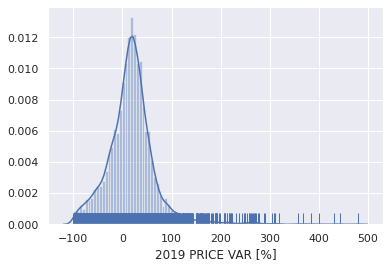

In [29]:
sns.distplot(df_outlier['2019 PRICE VAR [%]'],bins=100,rug=True);

In [19]:
df2018_class = pd.DataFrame(df2018['Class'].value_counts().reset_index())
df2018_class.rename(columns={'index':'Class','Class':'Quantity'},inplace=True)
df2018_class

,Class,Quantity
0,1,3046
1,0,1346


Visualize the distribution of class. 

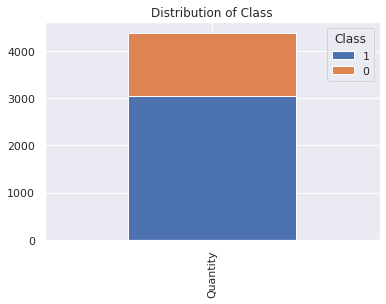

In [20]:
sns.set()
df2018_class.set_index('Class').T.plot(kind='bar', stacked=True)
plt.title('Distribution of Class')
plt.show();

*Check sector distribution of these companies.*

In [17]:
df_sector = pd.DataFrame(df2018['Sector'].value_counts().reset_index())
df_sector.rename(columns={'index':'Sector','Sector':'Quantity'},inplace=True)
df_sector

,Sector,Quantity
0,Financial Services,824
1,Healthcare,691
2,Technology,636
3,Industrials,574
4,Consumer Cyclical,506
5,Basic Materials,276
6,Real Estate,255
7,Energy,248
8,Consumer Defensive,191
9,Utilities,102


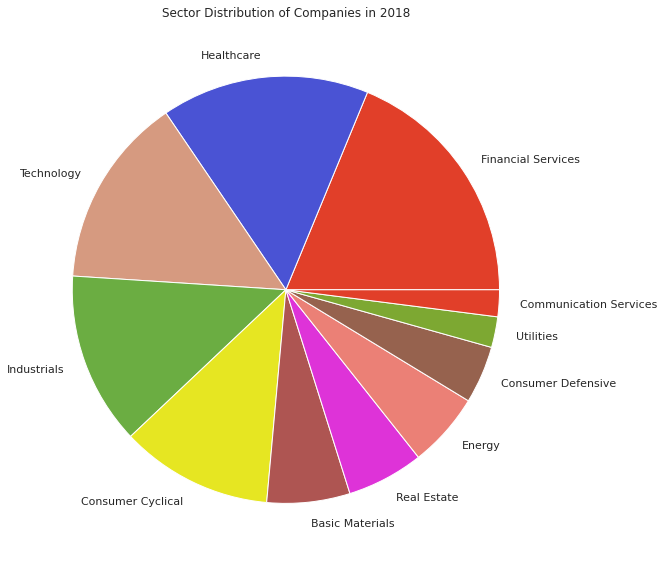

In [22]:
colors = ["#E13F29", "#4a53d4","#D69A80","#6bad42","#e6e622", "#AE5552", "#de33d8", "#EB8076", "#96624E","#7da832"]
plt.figure(figsize=(15,8))
plt.pie(
    df_sector['Quantity'],
    labels=df_sector['Sector'],
    shadow=False,
    colors=colors,
)
plt.title('Sector Distribution of Companies in 2018')
plt.tight_layout()
plt.show()

In [30]:
df2018.isnull().sum()

Unnamed: 0                0
Revenue                  46
Revenue Growth          139
Cost of Revenue         185
Gross Profit             64
                       ... 
R&D Expense Growth      259
SG&A Expenses Growth    248
Sector                    0
2019 PRICE VAR [%]        0
Class                     0
Length: 225, dtype: int64

In [31]:
#Based on different sector, replace nan-values with median value of column
df2018_sector = df2018.groupby(['Sector']).transform(lambda x: x.fillna(x.median()))

In [32]:
df2018_sector.isnull().sum()

Revenue                 0
Revenue Growth          0
Cost of Revenue         0
Gross Profit            0
R&D Expenses            0
                       ..
Debt Growth             0
R&D Expense Growth      0
SG&A Expenses Growth    0
2019 PRICE VAR [%]      0
Class                   0
Length: 223, dtype: int64

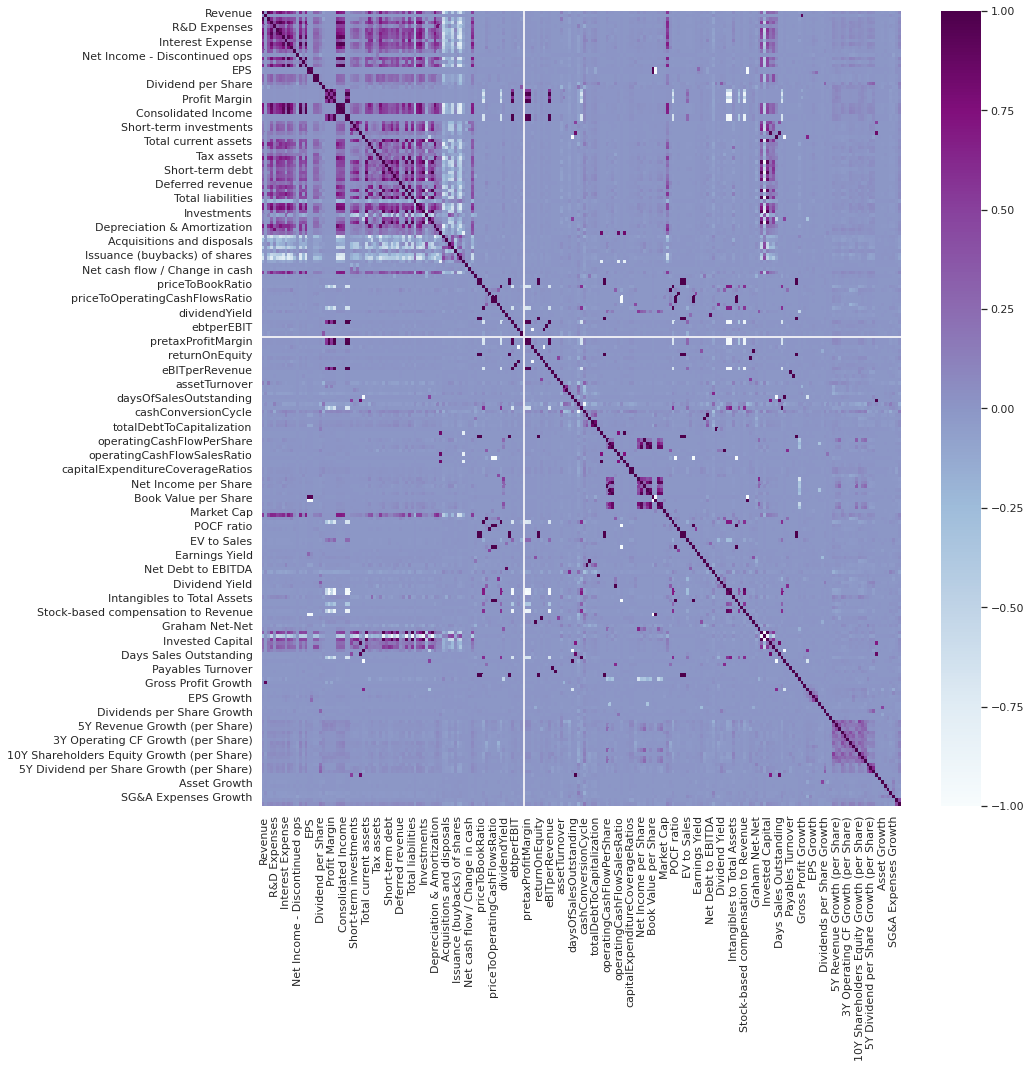

In [34]:
# Plot correlation matrix of output dataset
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(df2018_sector.corr(), annot=False, cmap='BuPu', vmin=-1, vmax=1, center=0, ax=ax)
plt.tight_layout()

###Financial Analysis on one company. Analysis on other companies can be done in the same manner. 

In [8]:
# Take Apple as an example
df2014_AAPL = df2014[df2014['Unnamed: 0'] =='AAPL' ]
df2015_AAPL = df2015[df2015['Unnamed: 0'] =='AAPL' ]
df2016_AAPL = df2016[df2016['Unnamed: 0'] =='AAPL' ]
df2017_AAPL = df2017[df2017['Unnamed: 0'] =='AAPL' ]
df2018_AAPL = df2018[df2018['Unnamed: 0'] =='AAPL' ]

In [9]:
df2014_AAPL

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,...,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],Class
3234,AAPL,"182,795,000,000",0,"112,258,000,000","70,537,000,000","6,041,000,000","11,993,000,000","18,034,000,000","52,503,000,000",0,"53,483,000,000","13,973,000,000",0,0,"39,510,000,000",0,"39,510,000,000",6,6,"5,987,867,000","6,085,572,000",2,0,0,0,0,0,"61,429,000,000","53,483,000,000","39,510,000,000",0,0,"13,844,000,000","11,233,000,000","25,077,000,000","27,219,000,000","2,111,000,000","68,531,000,000","20,624,000,000","8,758,000,000",...,2,94,0,-2,0,0,0,0,0,0,-0,-0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-0,1,0,0,Technology,-2,0


In [12]:
df_AAPL = df2014_AAPL.append([df2015_AAPL,df2016_AAPL,df2017_AAPL,df2018_AAPL])
df_AAPL.index = [2014,2015,2016,2017,2018]
df_AAPL.replace(np.nan, 0)

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,...,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],Class,2016 PRICE VAR [%],2017 PRICE VAR [%],2018 PRICE VAR [%],2019 PRICE VAR [%]
2014,AAPL,"182,795,000,000",0,"112,258,000,000","70,537,000,000","6,041,000,000","11,993,000,000","18,034,000,000","52,503,000,000",0,"53,483,000,000","13,973,000,000",0,0,"39,510,000,000",0,"39,510,000,000",6,6,"5,987,867,000","6,085,572,000",2,0,0,0,0,0,"61,429,000,000","53,483,000,000","39,510,000,000",0,0,"13,844,000,000","11,233,000,000","25,077,000,000","27,219,000,000","2,111,000,000","68,531,000,000","20,624,000,000","8,758,000,000",...,0,0,0,0,0,0,-0,-0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-0,1,0,0,Technology,-2,0,0,0,0,0
2015,AAPL,"233,715,000,000",0,"140,089,000,000","93,626,000,000","8,067,000,000","14,329,000,000","22,396,000,000","71,230,000,000",0,"72,515,000,000","19,121,000,000",0,0,"53,394,000,000",0,"53,394,000,000",9,9,"5,702,722,000","5,753,421,000",2,0,0,0,0,0,"83,772,000,000","72,515,000,000","53,394,000,000",0,0,"21,120,000,000","20,481,000,000","41,601,000,000","30,343,000,000","2,349,000,000","89,378,000,000","22,471,000,000","9,009,000,000",...,0,0,0,0,0,0,-0,-0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,Technology,0,1,12,0,0,0
2016,AAPL,"215,639,000,000",-0,"131,376,000,000","84,263,000,000","10,045,000,000","14,194,000,000","24,239,000,000","60,024,000,000",0,"61,372,000,000","15,685,000,000",0,0,"45,687,000,000",0,"45,687,000,000",8,8,"5,388,443,000","5,470,820,000",2,0,0,0,0,0,"71,877,000,000","61,372,000,000","45,687,000,000",0,0,"20,484,000,000","46,671,000,000","67,155,000,000","29,299,000,000","2,132,000,000","106,869,000,000","27,010,000,000","8,620,000,000",...,-0,-0,-0,-0,-0,-0,-0,-0,0,-0,-0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0,-0,0,0,0,0,-0,Technology,0,1,0,48,0,0
2017,AAPL,"229,234,000,000",0,"141,048,000,000","88,186,000,000","11,581,000,000","15,261,000,000","26,842,000,000","61,344,000,000",0,"64,089,000,000","15,738,000,000",0,0,"48,351,000,000",0,"48,351,000,000",9,9,"5,165,228,000","5,217,242,000",2,0,0,0,0,0,"74,246,000,000","64,089,000,000","48,351,000,000",0,0,"20,289,000,000","53,892,000,000","74,181,000,000","35,673,000,000","4,855,000,000","128,645,000,000","33,783,000,000",0,...,0,0,0,0,0,0,-0,-0,0,-0,-0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Technology,0,0,0,0,-7,0
2018,AAPL,"265,595,000,000",0,"163,756,000,000","101,839,000,000","

In [15]:
df_AAPL.columns.tolist()

['Unnamed: 0',
 'Revenue',
 'Revenue Growth',
 'Cost of Revenue',
 'Gross Profit',
 'R&D Expenses',
 'SG&A Expense',
 'Operating Expenses',
 'Operating Income',
 'Interest Expense',
 'Earnings before Tax',
 'Income Tax Expense',
 'Net Income - Non-Controlling int',
 'Net Income - Discontinued ops',
 'Net Income',
 'Preferred Dividends',
 'Net Income Com',
 'EPS',
 'EPS Diluted',
 'Weighted Average Shs Out',
 'Weighted Average Shs Out (Dil)',
 'Dividend per Share',
 'Gross Margin',
 'EBITDA Margin',
 'EBIT Margin',
 'Profit Margin',
 'Free Cash Flow margin',
 'EBITDA',
 'EBIT',
 'Consolidated Income',
 'Earnings Before Tax Margin',
 'Net Profit Margin',
 'Cash and cash equivalents',
 'Short-term investments',
 'Cash and short-term investments',
 'Receivables',
 'Inventories',
 'Total current assets',
 'Property, Plant & Equipment Net',
 'Goodwill and Intangible Assets',
 'Long-term investments',
 'Tax assets',
 'Total non-current assets',
 'Total assets',
 'Payables',
 'Short-term debt'

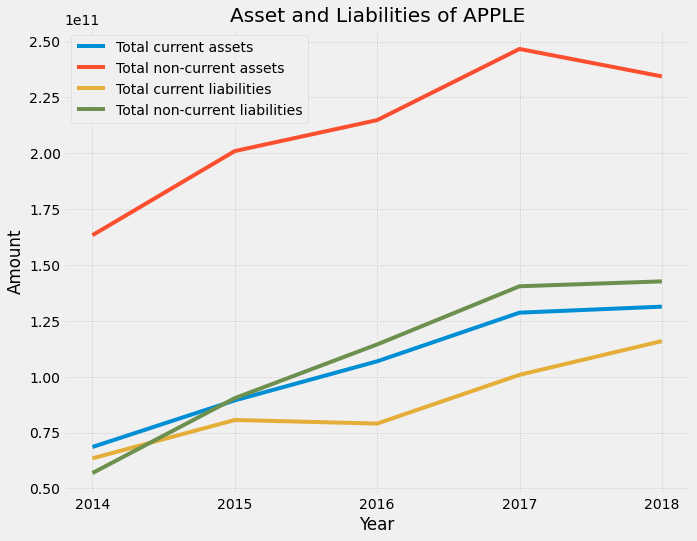

In [32]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 8
plt.style.use('fivethirtyeight')
plt.title('Asset and Liabilities of APPLE')
plt.grid(True, linestyle=':')
plt.xticks([2014,2015,2016,2017,2018])
plt.xlabel('Year')
plt.ylabel('Amount')
plt.plot(df_AAPL['Total current assets'],label='Total current assets')
plt.plot(df_AAPL['Total non-current assets'],label='Total non-current assets')
plt.plot(df_AAPL['Total current liabilities'],label='Total current liabilities')
plt.plot(df_AAPL['Total non-current liabilities'],label='Total non-current liabilities')
plt.legend(loc=2);

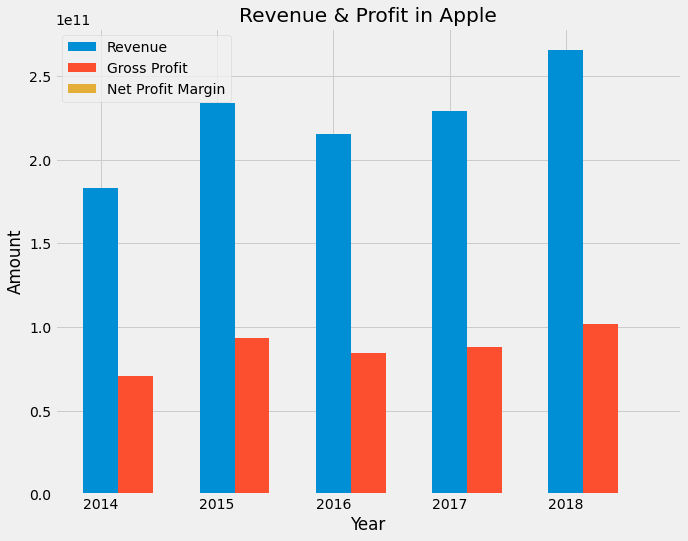

In [50]:
plt.style.use('fivethirtyeight')
rcParams['figure.figsize'] = 10, 8
pos = np.arange(len(df_AAPL))
year = [2014,2015,2016,2017,2018]
plt.bar(pos,df_AAPL['Revenue'],width = 0.3, label='Revenue')
plt.bar(pos+0.3,df_AAPL['Gross Profit'],width = 0.3,label='Gross Profit')
plt.bar(pos+0.6,df_AAPL['Net Profit Margin'],width = 0.3,label='Net Profit Margin')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.xticks(pos,year)
plt.title('Revenue & Profit in Apple')

plt.legend();


In [51]:
df_AAPL['Net Profit Margin']

2014   0
2015   0
2016   0
2017   0
2018   0
Name: Net Profit Margin, dtype: float64